In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as col
import sys
sys.path.append('/pool/firebolt1/p484/projects/huang/rings')
from continuumanalysis3 import Continuum
from fitellipse import *
from analyzeradprofile import *

In [2]:
disk =  {'filename': '/data/sandrews/ALMA_disks/DR/OLD/fiducial_images/HD142666_continuum.fits',
                          'distance':148,
                          'incl' : 62.2,
                          'PA' : 162.1,
                          'offsetx' : -.0435,
                          'offsety' : 0.0289,
                          'size': 1,
                          'gamma': 0.9
                         }
maxrad = 80
radialbins = 0.5+1*np.arange(maxrad)

In [4]:


cont = Continuum(disk['filename'], disk['offsetx'],disk['offsety'], disk['PA'], disk['incl'], disk['distance'])


_,_, rtmap = cont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))
surfbrightness, SB_scatter = cont.radialprofile(radialbins, high_incl = True)

print("max",find_profile_extrema(radialbins, surfbrightness, extrema = 'max'))
print("min",find_profile_extrema(radialbins, surfbrightness, extrema = 'min'))



max [6, 20, 39, 57]
min [1, 16, 37, 55, 78]


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1257: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1218: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


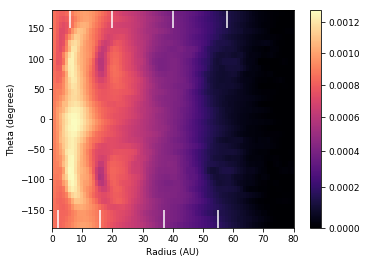

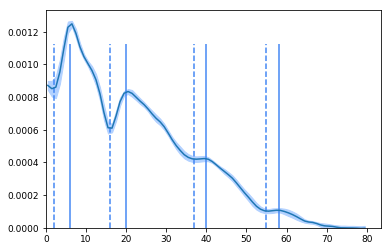

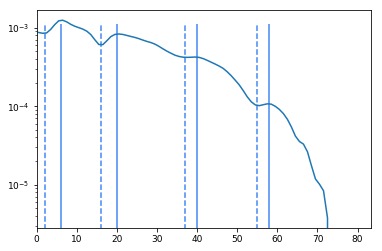

In [5]:
plt.imshow(rtmap,extent =[0.5, np.max(radialbins)+0.5, -180,180], 
           aspect = 0.2, origin = 'lower', cmap = 'magma', norm = col.PowerNorm(gamma = disk['gamma']))
gaps = np.array([2,16,37,55])
rings = np.array([6,20,40,58])
for gap in gaps:
    plt.vlines(gap,-180,-150, color ='white')
for ring in rings:
    plt.vlines(ring,150,180, color ='white')
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()

plt.plot(radialbins, surfbrightness)
plt.fill_between(radialbins,(surfbrightness - SB_scatter),(surfbrightness + SB_scatter),facecolor = '#B2D1FF',edgecolor = '#B2D1FF')
for gap in gaps:
    plt.vlines(gap,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4')
plt.xlim(xmin = 0)
plt.ylim(ymin =0)
plt.show()


plt.semilogy(radialbins, surfbrightness)
for gap in gaps:
    plt.vlines(gap,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4')
plt.xlim(xmin = 0)
plt.show()

In [5]:
measure_widths(2.00,6.00, radialbins, surfbrightness, 0, 80)

0.00104723869813 4.2


(3.6999999999999993, 5.2999999999999989)

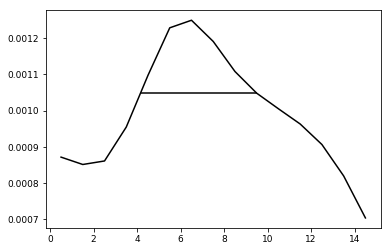

In [7]:
plt.plot(radialbins[:15], surfbrightness[:15], color = 'black')
plt.hlines(0.00104723869813, 4.2, 4.2+5.3)

In [6]:
calc_contrast(16.0001, 20.0001, radialbins, surfbrightness, SB_scatter, cont, high_incl = True)

(0.73114761419125107, 0.021213072907116749)

In [9]:
measure_widths(16.001,20.001, radialbins, surfbrightness, 2, 80)

0.000720124926673 17.9


(3.4999999999999982, 7.8000000000000007)

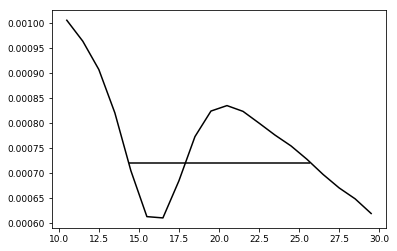

In [13]:
plt.plot(radialbins[10:30], surfbrightness[10:30], color = 'black')
plt.hlines(0.000720124926673, 17.9-3.5, 17.9)
plt.hlines(0.000720124926673, 17.9, 17.9+7.8)

In [14]:
measure_widths(37.001,40.001, radialbins, surfbrightness, 0, 80)

0.000421493623843 38.4


(1.6000000000000014, 1.7000000000000028)

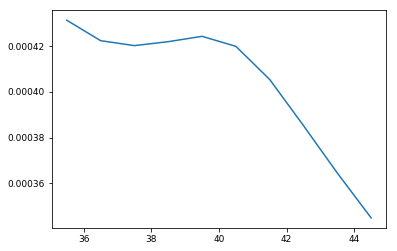

In [28]:
plt.plot(radialbins[35:45], surfbrightness[35:45])

In [7]:
calc_contrast(37.001, 40.00, radialbins, surfbrightness, SB_scatter,cont, high_incl = True)

(0.99045149191186477, 0.022746907560531836)

In [17]:
measure_widths(55.001,58.001, radialbins, surfbrightness, 0, 80)

0.000104917533462 56.6


(2.1999999999999957, 2.1000000000000014)

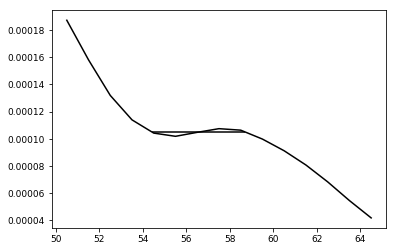

In [19]:
plt.plot(radialbins[50:65], surfbrightness[50:65], color = 'black')
plt.hlines(0.000104917533462, 56.6-2.2, 56.6)
plt.hlines(0.000104917533462, 56.6, 56.6+2.1)

In [8]:
calc_contrast(55.001, 58.001, radialbins, surfbrightness, SB_scatter,cont, high_incl = True)

(0.95741518617929278, 0.057893918097787517)

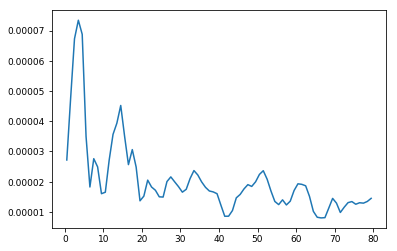

In [8]:
plt.plot(radialbins, SB_scatter)

In [7]:
bins = 0.5+1*np.arange(0, 120)

cumeflux = cont.cumefluxprofile(bins)

58.5


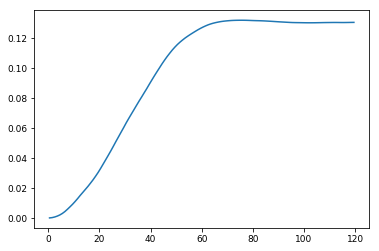

In [8]:
plt.plot(bins, cumeflux)
print(bins[np.argmin(np.abs(cumeflux-0.95*np.max(cumeflux)))])